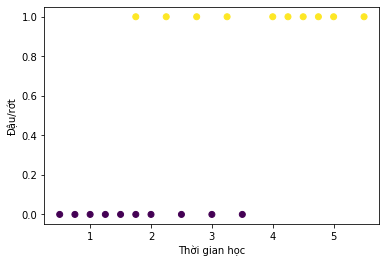

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50,
1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25,
4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
0, 1, 1, 1, 1, 1, 1])
plt.scatter(X, y, c = y)
plt.xlabel('Thời gian học')
plt.ylabel('Đậu/rớt')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X.reshape(-1,1), y)
clf.predict_proba(np.array([0.75]).reshape(-1,1))
print(clf.coef_)
print(clf.intercept_)

[[1.14860386]]
[-3.13952411]


In [6]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pre = clf.predict(X.reshape(-1,1))
cm = confusion_matrix(y, y_pre)
cm

array([[8, 2],
       [2, 8]], dtype=int64)

In [7]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [8]:
print(sigmoid(np.dot(w[-1].T, [1, 0.75])))

[0.05078108]


In [9]:
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])